
## Face Classification by SVM on Eigenfaces
We are going to build a classifier to distinguish the faces of 40 people on a toy dataset. The dataset includes 400 pictures of 40 people faces, each by a 64*64 pixel picture. Use the following cell to download the dataset:

In [76]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images[0].shape)

(400, 4096)
(64, 64)



### Visualization of the Faces 
Plot an image of each class in one figure using subplots. (Note that the design matrix X is availabe in <code>faces.data</code> and the target values available in <code>faces.target</code> .)

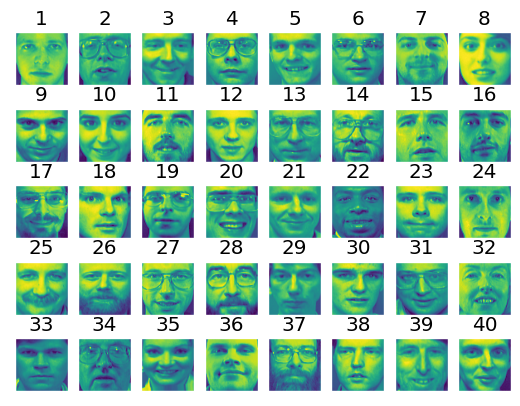

In [77]:
#TODO
fig = plt.figure() # create a new figure window
for i in range(40): # display 40 images
    # subplot : 5 rows and 8 columns
    img_grid = fig.add_subplot(5, 8, i+1)
    # plot first image of each class
    img_grid.imshow(faces.images[i*10])
    img_grid.set_yticks([])
    img_grid.set_xticks([])
    img_grid.set_title(i+1)

plt.show()


### Train-Test Split
Split the data into train and test sets and print the dimensions of each set. (70% for train and 30% for test)

In [78]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(
        faces.data, faces.target,
        train_size=0.7,
        test_size=0.3,
        random_state=7,
        stratify=faces.target
    )

print("X_train shape:",train_features.shape)
print("y_train shape:{}".format(train_targets.shape))

X_train shape: (280, 4096)
y_train shape:(280,)



### Dimensionality Reduction 
As you might have guessed, the number of featuers, i.e. pixels, is quite large and training a classifier might take a considerbale time. However, using a wise method to reduce the dimension of our data could decrease the cost of training the model. In the following cell use PCA (Principal Component Analysis) to reduce the dimension of the dataset. Choose an appropirate number of components in your PCA and explain your reason for your choice.

66

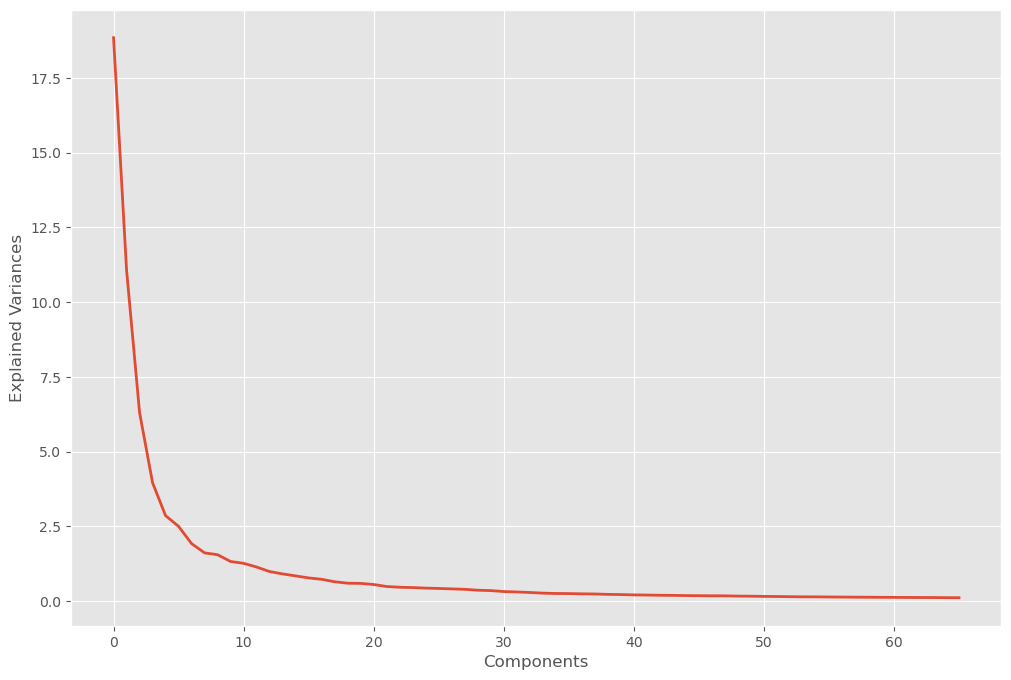

In [79]:
from sklearn.decomposition import PCA
#use to keep 0.9 of varaince
pca=PCA(n_components=0.9)
pca.fit(faces.data)
plt.figure(1,figsize=(12,8))
plt.plot(pca.explained_variance_,linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
#get the n componenet that keep 0.9
pca.n_components_

<font face="Times New Roman" size=4><div dir=ltr>
Plot the scree plot of the proportion of the variance explained(PVE) vs principal components to determine the number of principal components for futher analysis.

Text(0.5, 1.0, 'Scree Plot')

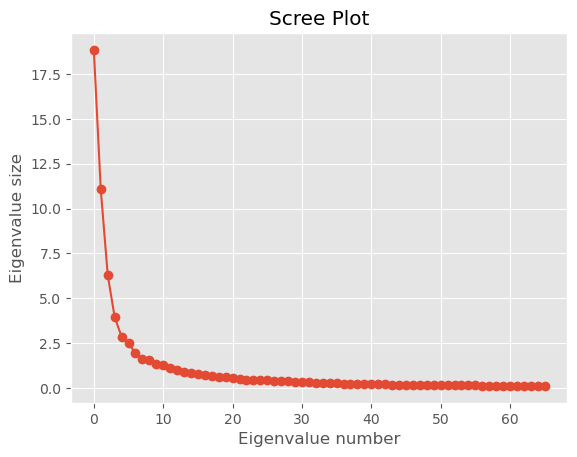

In [80]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

### Eigenfaces: Principal Components Visualization 
Plot the mean face using your PCA model with <code>pca.mean_</code> attribute followed by a reshape to original dimensions. What is this mean vector?

Text(0.5, 1.0, 'Mean Face')

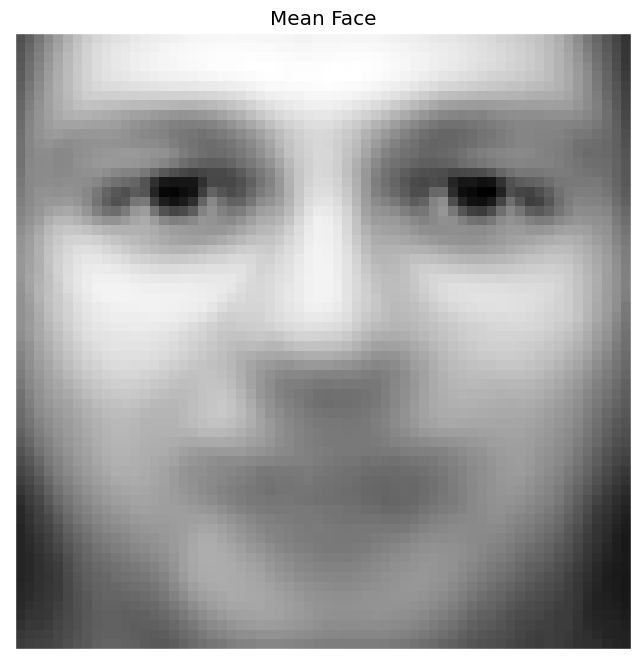

In [81]:
#plot mean face
meanfig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Mean Face')


<font face="Times New Roman" size=4><div dir=ltr>
Eigenfaces is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. Plot the 30 first eigenfaces sorted by their rank from the most important to the lowest. Can you explain what these faces indicate?

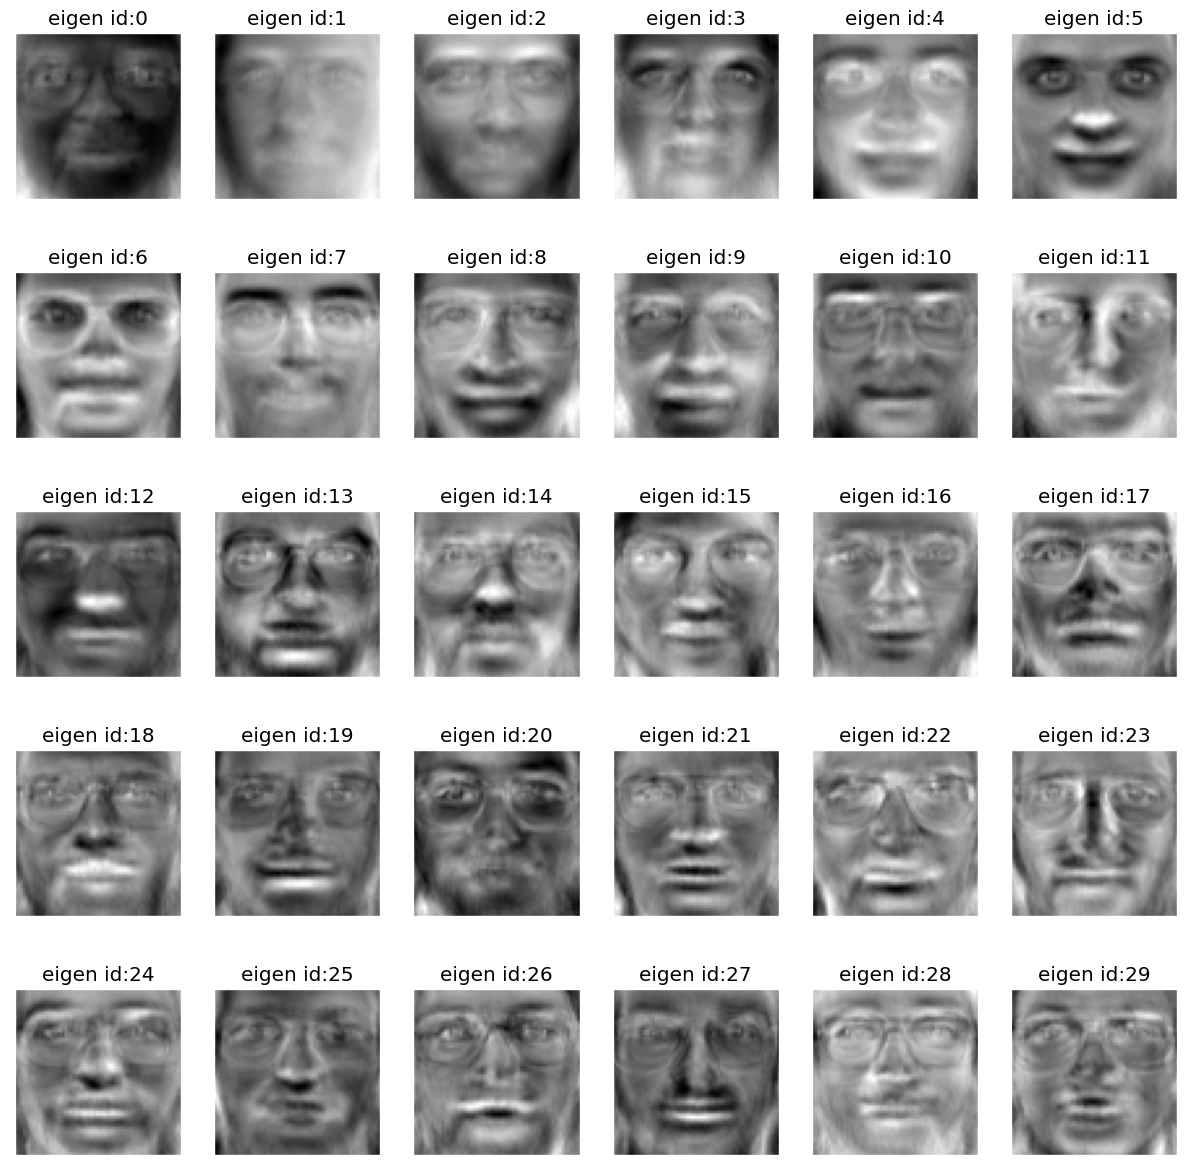

In [82]:
eigen_faces=pca.components_.reshape((len(pca.components_),64,64))
eigen_faces_fig,eigen_faces_axarr=plt.subplots(nrows=5,ncols=6,figsize=(15,15))
eigen_faces_axarr=eigen_faces_axarr.flatten()
for i in range(30):
    eigen_faces_axarr[i].imshow(eigen_faces[i],cmap="gray")
    eigen_faces_axarr[i].set_xticks([])
    eigen_faces_axarr[i].set_yticks([])
    eigen_faces_axarr[i].set_title("eigen id:{}".format(i))

    



<font face="Times New Roman" size=4><div dir=ltr>
Transform your train and test sets to the new feature space using your PCA module. 

In [83]:
train_features_pca=pca.transform(train_features)
test_feature_pca=pca.transform(test_features)


### Training your SVM Classifier
Train an SVM classifier on the transformed dataset in the new feature space. You should use Grid Search Cross Validation or other validation techniques to obtain the best hyperparameters for your classifier. 

In [84]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

  
clf=svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1,10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 
  
grid = GridSearchCV(clf, param_grid, refit = True)

# fitting the model for grid search
grid.fit(train_features_pca, train_targets)
clf=grid.best_estimator_
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)
0.9428571428571428


<font face="Times New Roman" size=4><div dir=ltr>
After training your model, we can check its prediction on test samples. Run the following cell to check your model predictions with the target values on test samples. Predictions with red label indicate false classification of your model.

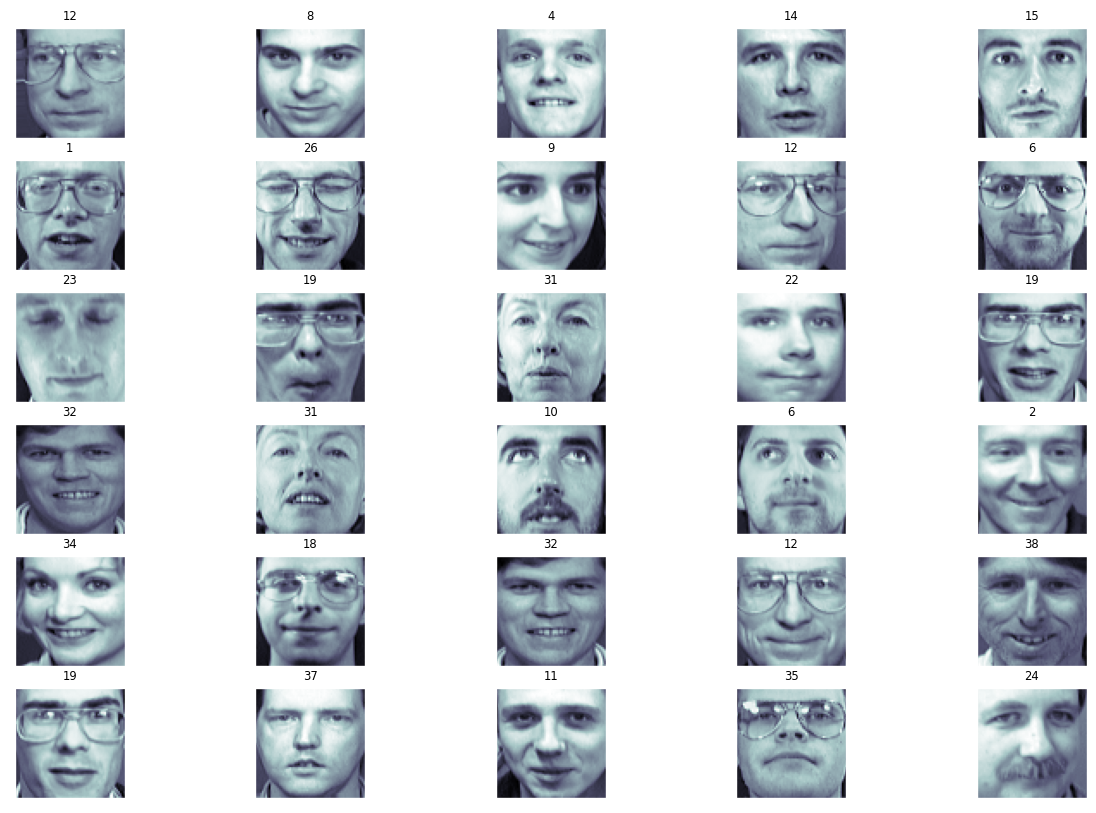

In [85]:
fig = plt.figure(figsize=(15, 10))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_features[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(test_feature_pca[i, np.newaxis])[0] #X_test_new is the transformed X_test after PCA.
    color = ('black' if y_pred == test_targets[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)


## Performance Measures
Let's evaluate your classifier to find out how good your model is.
    
    
### Precision Recall Tradeoff 
Plot the precision and recall versus the decision threshold figure and precision vs recall figure.

Average precision score, micro-averaged over all classes: 0.98


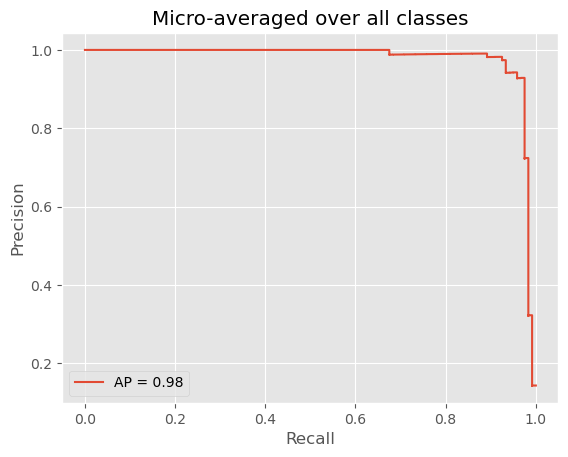

In [86]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
test_targets_predeicted=clf.predict(test_feature_pca)

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import PrecisionRecallDisplay

binirized_target=label_binarize(faces.target, classes=range(40))

n_classes=binirized_target.shape[1]
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(faces.data, binirized_target,test_size=0.3, stratify=binirized_target,random_state=0)
pca=PCA(n_components=len(pca.components_), whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca=pca.transform(X_train_multiclass)
X_test_multiclass_pca=pca.transform(X_test_multiclass)    

oneRestClassifier=OneVsRestClassifier(clf)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca) 
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))    

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")                                                                         

#TODO

Then find the decision threshold, where the recall is equal to the precision. Write down it in the below cell:
    <br>
note: it should be apparent in the above figures.

decision_threshold = ?

recall at the above threshold = ?


### ROC/AUC
Train a RandomForestClassifier with 30 estimators then plot a ROC curve, and calculate AUC for both randomForsetClassifier and your SVM classifier that you trained earlier, which one is the best by considering AUC indicator?


In [87]:
from sklearn.ensemble import RandomForestClassifier
#TODO: Train the random forest on the data
rfclf=RandomForestClassifier(n_estimators=30)
rfclf.fit(train_features_pca,train_targets)
test_targets_predeicted_rf=rfclf.predict(test_feature_pca)

In [88]:
from sklearn import metrics

# TODO: plot roc_curve and print roc_auc_score for svm and random forest classifiers



### Classification Report 
Use the <code>classification_report</code> to describe the performance of your SVM model with different metrics. Explain your results and compare the predictions of model on different classes in few sentences.

In [89]:
from sklearn.metrics import classification_report
print("Classification Results:\n{}".format(classification_report(test_targets, test_targets_predeicted)))


Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

### Confusion Matrix
Plot the confusion matrix of the classifier's predictions.
Let’s focus on the errors of the plot. Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors, then plot the result.

In [90]:
# TODO: calculate conf_mx then print it
conf_mx=metrics.confusion_matrix(test_targets, test_targets_predeicted)

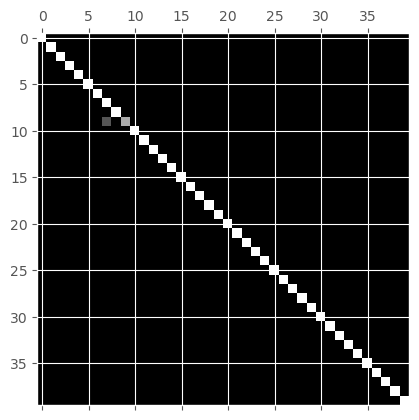

Confusion matrix, without normalization
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


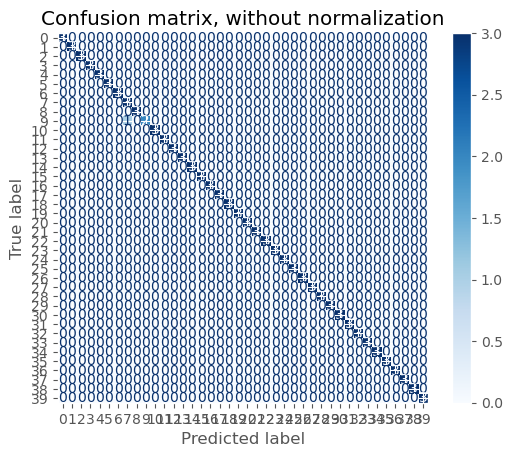

In [91]:
# TODO: after calculating confusion matrix, visualize it using below code
#WAY 1
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
#WAY 2
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    test_feature_pca,
    test_targets,
    display_labels=range(40),
    cmap=plt.cm.Blues,
    normalize=None
   
)
disp.ax_.set_title("Confusion matrix, without normalization")

print("Confusion matrix, without normalization")
print(disp.confusion_matrix)

plt.show()

Confusion matrix, with normalization


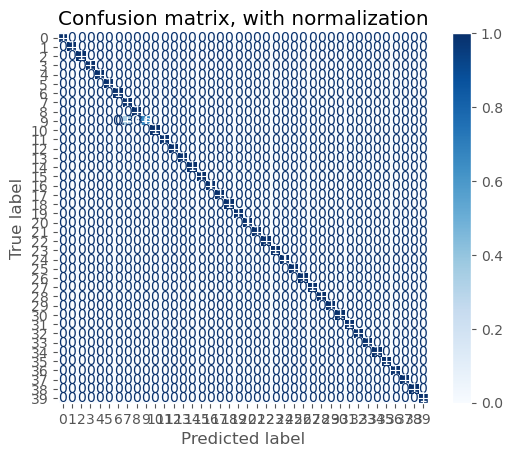

In [93]:
# TODO: calculate norm_conf_mx then print it
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    test_feature_pca,
    test_targets,
    display_labels=range(40),
    cmap=plt.cm.Blues,
    normalize="true",
)
disp.ax_.set_title("Confusion matrix, with normalization")

print("Confusion matrix, with normalization")
print(disp.confusion_matrix)


In [ ]:
#visualize with normal
plt.show()